In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("CourseList_with_Credits_Prerequisites_and_Difficulty.csv")

In [3]:
data

,Course Code,Credits,Difficulty,Pre-requisite
0,MAT101,4,4,None
1,MAT106,4,4,None
2,MAT105,4,4,MAT101
3,MAT202,4,4,"MAT101,MAT106"
4,MAT203,3,4,MAT105
5,MAT207,4,4,"MAT101,MAT105"
6,CSE220,5,4,"CSE101,MAT106"
7,CSE101,3,3,None
8,CSE205,4,4,MAT202
9,CSE208,4,5,MAT106


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
Course Code      14 non-null object
Credits          14 non-null int64
Difficulty       14 non-null int64
Pre-requisite    14 non-null object
dtypes: int64(2), object(2)
memory usage: 528.0+ bytes


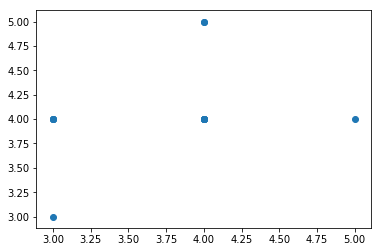

In [7]:
plt.scatter(data['Credits'],data['Difficulty'])

In [12]:
clmns = ['Credits','Difficulty']
kmeans=KMeans(n_clusters=5,random_state=0).fit(data[clmns])
labels = kmeans.labels_
data['clusters'] = labels
clmns.extend(['clusters'])
print(data[clmns].groupby(['clusters']).mean())

          Credits  Difficulty
clusters                     
0               3           4
1               4           5
2               4           4
3               5           4
4               3           3


Text(27.9128,0.5,'Difficulty')

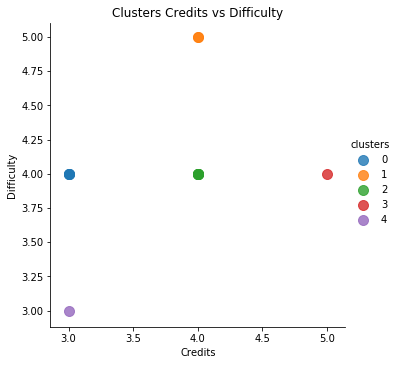

In [13]:
sns.lmplot('Credits', 'Difficulty', 
           data=data, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters Credits vs Difficulty')
plt.xlabel('Credits')
plt.ylabel('Difficulty')

In [14]:
#part2

ar3=[]
ar1=[]
ar2=[]
ar4=[]
flag=0
for x,y in zip(data['Pre-requisite'],data['Course Code']):
    if(x=='None'):
        ar1.append(y)
print("Level1 courses: ",ar1)
for x,y in zip(data['Pre-requisite'],data['Course Code']):
    if(len(x)>6):
        z=x.split(",")
        for a in z:
            flag=0
            if (a not in ar1):
                flag=1
        if(flag==0):
            ar2.append(y)
        else:
            ar3.append(y)        
    else:
        if(x in ar1):
            ar2.append(y)
print("Level2 courses: ",ar2)
for x,y in zip(data['Pre-requisite'],data['Course Code']):
    if(x in ar2):
        ar3.append(y)
print("Level3 courses: ",ar3)
for x,y in zip(data['Pre-requisite'],data['Course Code']):
    if(x in ar3):
        ar4.append(y)
print("Level4 courses: ",ar4)




Level1 courses:  ['MAT101', 'MAT106', 'CSE101', 'MAT206']
Level2 courses:  ['MAT105', 'MAT202', 'CSE220', 'CSE208']
Level3 courses:  ['MAT207', 'MAT203', 'CSE205', 'CSE327', 'CSE418']
Level4 courses:  ['MEE437']
